I took the liberty of playing with the assignment.

Just click 'Start' button to see animation (you may need to click a couple of times and move mouse out of button area).

Play with 'real batting average':
better chances mean the blue plot moves further to the right (increasing the mean), with worse chances it moves to the left.
------------------------------------------------------------------------------------------------------------------------------------





More on the task and the code.

Instead of showing 4 different distributions and animations on top of it I decided to visualize the following nicely
written article about beta distribution:

http://varianceexplained.org/statistics/beta_distribution_and_baseball/

To summarize:

How to estimate the batting average of a player for a coming season whose actual batting average (hits at bat/total hits) are unknown? Beta-distribution allows to estimate and adjust this unknown mean. 
The auther estimates prior batting average of a player at 0.27 (27%) with confident intervals at [0.21, 0.35].
For that he builds a beta-distribution with parameters a=81, b=219 (or with wider confident intervals a=27, b=73).
Then he takes a player with an actual batting average of 0.33 and starts making new beta-distributions which shifts to the right in comparison with the pre-season beta-distribution.

Points of interests:

1. The visualization is divived in 5 parts using 'gridspec': actual plot, horizontal bar, slider, 2 buttons
2. The animation shows a new beta-distribution (on top of pre-season beta-distribution) for every hit (to total of 100) a player does. Using a player's real batting average I build a distribution of succesful/unsuccessful hits (a binomial distribution).
3. "Start" button starts animation (you may need to click it more than 1 time and move mouse out of the button's scope).
4. "Reset" button clears the plot (need to wait for animation to finish).


<IPython.core.display.Javascript object>


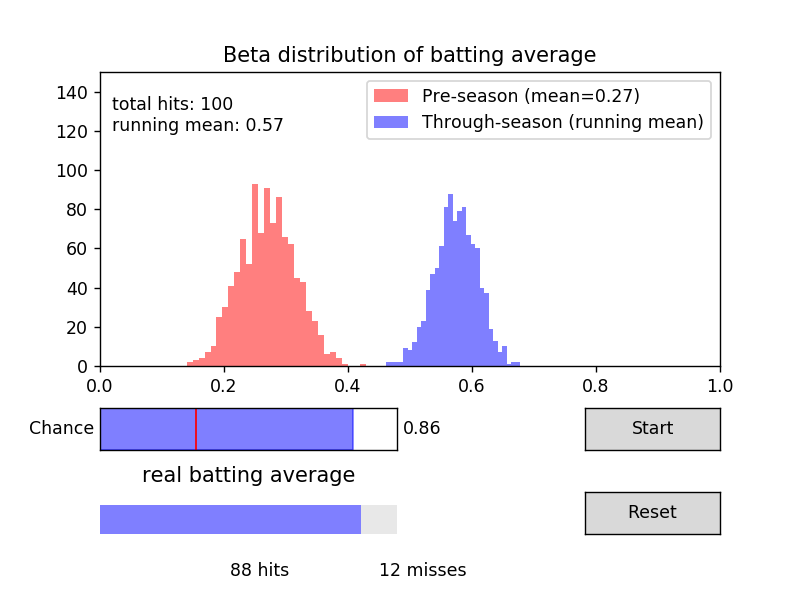

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
from matplotlib.widgets import Slider, Button

#n, pre_alpha, pre_beta = 300, 81, 219
n, pre_alpha, pre_beta = 100, 27, 73


#colors = ['#ff512f','#dd2476']
colors = ['red','blue']

fig = plt.figure()

gspec = gridspec.GridSpec(6, 4, hspace=1)

top_plot = plt.subplot(gspec[0:4, 0:])
slider_bar = plt.subplot(gspec[4,0:2])
chance_bar = plt.subplot(gspec[5, 0:2])
button_bar = plt.subplot(gspec[4,3])
reset_bar = plt.subplot(gspec[5,3])

#slider_bar.axis('off')
#chance_bar.axis('off')

def update_val(val):
    update_bar(schance.val)
    
def update_bar(ch):
    global strikes
    strikes = np.random.binomial(1, ch, n)
    hits = sum(strikes)
    misses = n - sum(strikes)
    
    chance_bar.cla()
    chance_bar.set_title('real batting average')
    chance_bar.barh([1],[hits], height = 5, color='blue', alpha=0.5)
    chance_bar.barh([1],[misses], height = 5, left = hits,color='lightgray', alpha=0.5)

    chance_bar.axis([0,n,0, 5])
    chance_bar.text(hits/2, -5, str(hits)+ ' hits')
    chance_bar.text(hits + misses/2 , -5, str(misses)+ ' misses')
    
    chance_bar.axis('off')
    
def reset_me(event):
    
    top_plot.cla()
    top_plot.set_title('Beta distribution of batting average')
    top_plot.hist(x1, bins=30, color=colors[0], alpha=0.5, label='Pre-season (mean=0.27)')
    top_plot.axis([0.0,1.0,0,150])
    top_plot.legend()
    
def start_anime(event):

    def update(current):
        if current==n:
            a.event_source.stop()
        
        top_plot.cla()
    
        hits_atbat = sum(strikes[:current+1])
        total = len(strikes[:current+1])
    
        x2 = np.random.beta(pre_alpha+hits_atbat, pre_beta+(total-hits_atbat),1000)
        mx2 = np.mean(x2)

        top_plot.set_title('Beta distribution of batting average')
        top_plot.hist(x1, bins=30, color=colors[0], alpha=0.5, label='Pre-season (mean=0.27)')
        top_plot.axis([0.0,1.0,0,150])
        top_plot.hist(x2,bins=30, color=colors[1], alpha=0.5, label='Through-season (running mean)')
        top_plot.text(0.02,120, 'total hits: {}\nrunning mean: {:0.2f}'.format(current,mx2))
    
        top_plot.legend()
        
    a = animation.FuncAnimation(fig, update, frames=range(0,n+1), interval = 25)
    
schance = Slider(slider_bar, 'Chance', 0.01, 1.0, valinit=0.33, color='blue', alpha=0.5)
schance.on_changed(update_val)

sbutton = Button(button_bar, 'Start')
sbutton.on_clicked(start_anime)

rbutton = Button(reset_bar,'Reset')
rbutton.on_clicked(reset_me)

update_bar(0.33) 
x1 = np.random.beta(pre_alpha, pre_beta, 1000)
pre_mean = np.mean(x1)

top_plot.set_title('Beta distribution of batting average')
top_plot.hist(x1, bins=30, color=colors[0], alpha=0.5, label='Pre-season (mean=0.27)')
top_plot.axis([0.0,1.0,0,150])
top_plot.legend()